# Abgabe gdv
Frühlingssemester 2025

Autor: Sandra Senn

## Einführung

Für das foglende Dokument wird der Datensatz 'Real Estate Sales 2001-2022' von kaggle benutzt. 

Der Datensatz ist hier abrufbar: https://www.kaggle.com/datasets/omniamahmoudsaeed/real-estate-sales-2001-2022/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/Real_Estate_Sales_2001-2022_GL.csv')
data.describe()
data.info()
data

C:\Users\Sandra\AppData\Local\Temp\ipykernel_21144\1408661977.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/Real_Estate_Sales_2001-2022_GL.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,2200073,2022,10/11/2022,Stamford,193 SADDLE HILL ROAD,483380.0,865000.0,0.5588,Residential,Single Family,NaN,NaN,NaN,POINT (-73.577612999 41.148977983)
1097625,220369,2022,09/29/2023,Wethersfield,37 LUCA LN,20650.0,760857.0,0.0271,Residential,Single Family,07 - Change in Property,NEW CONSTRUCTION - NOT COMPLETE FOR 10/1/2022,NaN,POINT (-72.663607 41.712487)
1097626,2200470,2022,01/09/2023,Stamford,1096 EAST MAIN STREET #16-D-1,132900.0,220000.0,0.6040,Residential,Condo,NaN,NaN,NaN,POINT (-73.515726977 41.057837988)
1097627,22396,2022,09/26/2023,Old Saybrook,115 SHEFFIELD ST,1099400.0,1575000.0,0.6980,Residential,Single Family,NaN,NaN,NaN,POINT (-72.368005967 41.289124997)


In [3]:
# Liste aller unterschiedlichen Orte (Stadtteile) ausgeben
distinct_towns = data['Town'].unique()
print(distinct_towns)
print(f"Anzahl unterschiedlicher Orte: {len(distinct_towns)}")

['Ansonia' 'Avon' 'Barkhamsted' 'Beacon Falls' 'Berlin' 'Bethel'
 'Bethlehem' 'Bolton' 'Branford' 'Bristol' 'Bridgeport' 'Brookfield'
 'Burlington' 'Canton' 'Cheshire' 'Colchester' 'Coventry' 'Cromwell'
 'Danbury' 'Colebrook' 'Darien' 'Derby' 'East Granby' 'East Haddam'
 'East Hartford' 'East Haven' 'East Lyme' 'East Hampton' 'Easton'
 'East Windsor' 'Enfield' 'Essex' 'Farmington' 'Fairfield' 'Franklin'
 'Glastonbury' 'Goshen' 'Granby' 'Greenwich' 'Guilford' 'Hamden'
 'Griswold' 'Groton' 'Kent' 'Hartford' 'Litchfield' 'Harwinton'
 'Killingly' 'Middletown' 'Killingworth' 'Lebanon' 'Lisbon' 'Madison'
 'Manchester' 'New Britain' 'Mansfield' 'Meriden' 'Middlebury' 'New Haven'
 'Milford' 'Monroe' 'Montville' 'Newtown' 'Naugatuck' 'North Stonington'
 'Norwalk' 'New Canaan' 'New Fairfield' 'Norwich' 'Old Saybrook'
 'New London' 'Plainfield' 'North Canaan' 'Portland' 'North Haven'
 'Ridgefield' 'Simsbury' 'Somers' 'Old Lyme' 'Orange' 'Plainville'
 'South Windsor' 'Plymouth' 'Preston' 'Putnam' 

In [25]:
# Bestimme die oberen und unteren Quantile (z.B. 1% und 99%)
lower = data['Sale Amount'].quantile(0.01)
upper = data['Sale Amount'].quantile(0.99)

# Clip die Werte im DataFrame
data_clipped = data.copy()
data_clipped['Sale Amount'] = data_clipped['Sale Amount'].clip(lower, upper)

# Erstelle die Liste der Top-Stadtteile
top_towns = data_clipped['Town'].value_counts().nlargest(10).index


avg_price_per_year = data_clipped.groupby('List Year')['Sale Amount'].mean()

### Line plot
Um die Entwicklung der durchschnittlichen Verkaufspreise im Zeitverlauf zu analysieren, ist das Liniendiagramm die beste Wahl. Es zeigt auf einen Blick, wie sich die Preise von Jahr zu Jahr verändert haben – etwa, ob es langfristige Steigerungen, Einbrüche (z.B. während der Finanzkrise 2008) oder stabile Phasen gab.

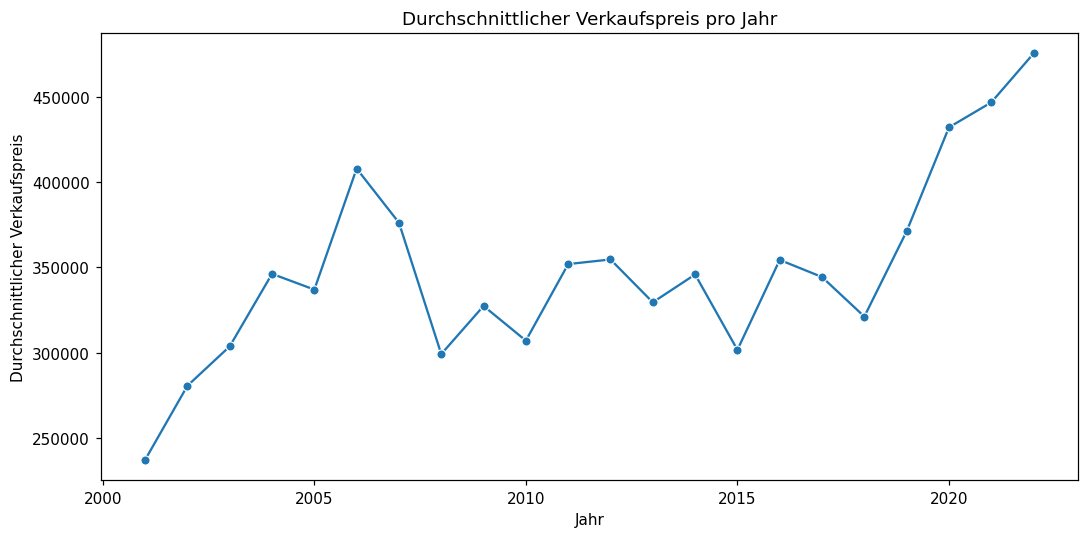

In [26]:
# Zeitreihe der durchschnittlichen Verkaufspreise (Liniendiagramm)
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_price_per_year.index, y=avg_price_per_year.values, marker='o')
plt.title('Durchschnittlicher Verkaufspreis pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittlicher Verkaufspreis')
plt.tight_layout()
plt.show()


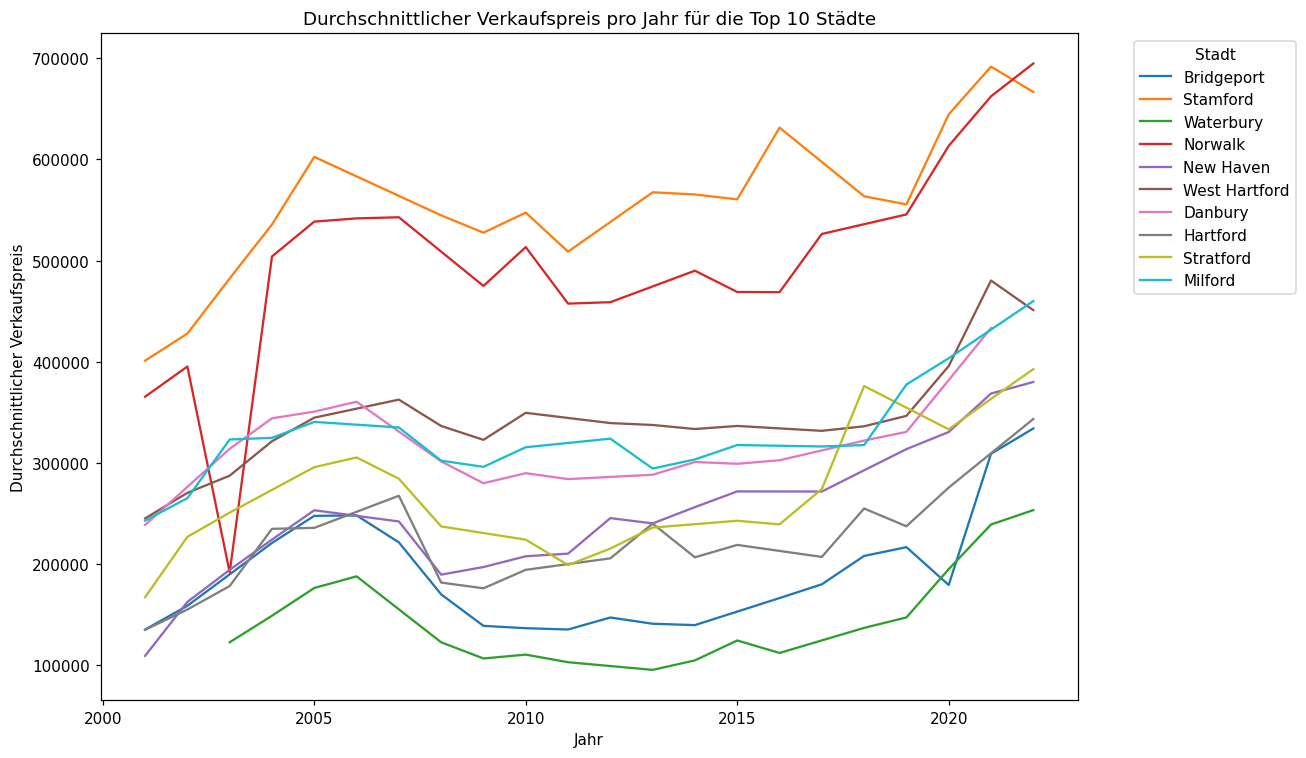

---


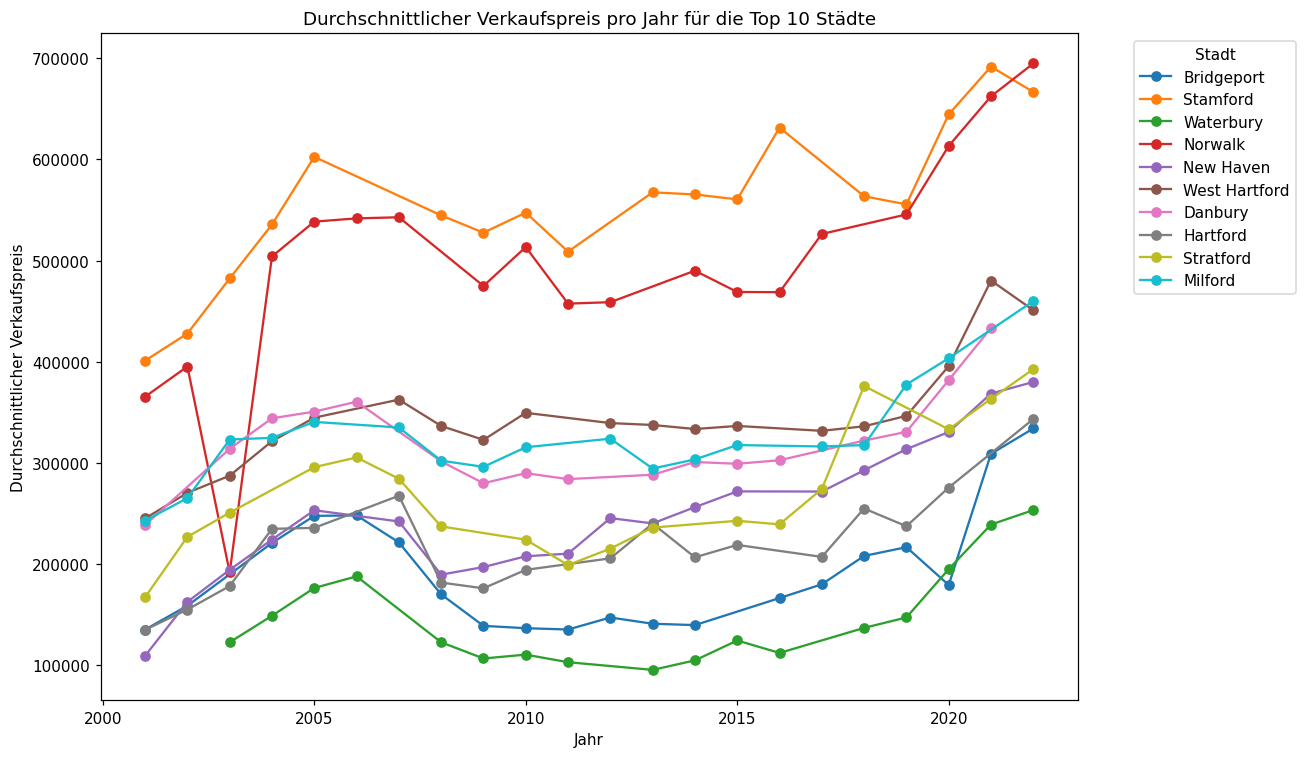

In [ ]:
# Gruppiere nach Stadt und Jahr und berechne den durchschnittlichen Verkaufspreis
avg_price_town_year = data_clipped.groupby(['Town', 'List Year'])['Sale Amount'].mean().reset_index()

# Nur die Top 10 Städte plotten
plt.figure(figsize=(12, 7))
for town in top_towns:
    subset = avg_price_town_year[avg_price_town_year['Town'] == town]
    plt.plot(subset['List Year'], subset['Sale Amount'], label=town)

plt.title('Durchschnittlicher Verkaufspreis pro Jahr für die Top 10 Städte')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittlicher Verkaufspreis')
plt.legend(title='Stadt', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


print('---')



# Gruppiere nach Stadt und Jahr und berechne den durchschnittlichen Verkaufspreis
avg_price_town_year = data_clipped.groupby(['Town', 'List Year'])['Sale Amount'].mean().reset_index()

# Nur die Top 10 Städte plotten
plt.figure(figsize=(12, 7))
for town in top_towns:
    subset = avg_price_town_year[avg_price_town_year['Town'] == town]
    plt.plot(subset['List Year'], subset['Sale Amount'], label=town, marker='o')

plt.title('Durchschnittlicher Verkaufspreis pro Jahr für die Top 10 Städte')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittlicher Verkaufspreis')
plt.legend(title='Stadt', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Boxplot
Um die Preisspannen und Ausreisser in verschiedenen Städten zu vergleichen, ist der Boxplot optimal. Er zeigt Median, Quartile und Ausreisser und macht Unterschiede zwischen den Stadtteilen sichtbar.

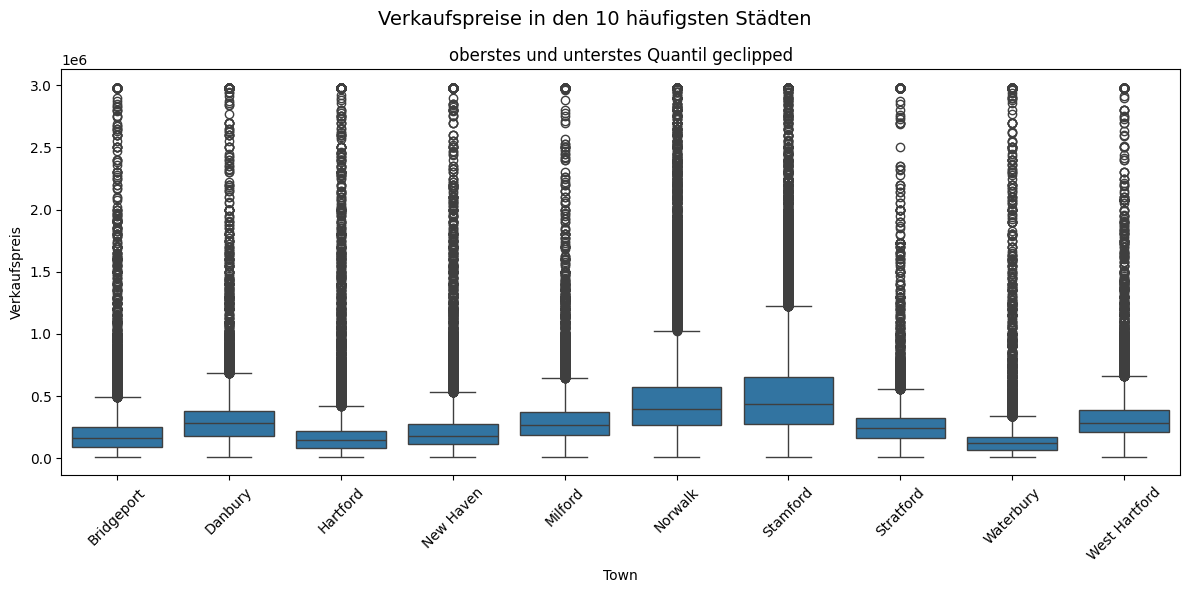

In [6]:
# Boxplot der Verkaufspreise in den Top-10-Stadtteilen
plt.figure(figsize=(12, 6))
sns.boxplot(x='Town', y='Sale Amount', data=data_clipped[data_clipped['Town'].isin(top_towns)])
plt.suptitle('Verkaufspreise in den 10 häufigsten Städten', fontsize=14)
plt.title('oberstes und unterstes Quantil geclipped', fontsize=12)
plt.ylabel('Verkaufspreis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Erkenntnis: Die Boxplots machen Unterschiede in der Preisspanne und Ausreisser sichtbar, wodurch besonders teure oder günstige Städte dentifiziert werden können.

Man erkennt auf einen Blick, welche Stadtteile besonders teure oder günstige Immobilien haben und wo es viele Ausreisser gibt.



### Balkendiagramm
Für den Vergleich der Anzahl der Verkäufe pro Stadt eignet sich das Balkendiagramm. Es zeigt die Verteilung der Transaktionen und macht Hotspots sichtbar.

C:\Users\Sandra\AppData\Local\Temp\ipykernel_21144\2237815611.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sale_counts.index, y=sale_counts.values, palette=colors)


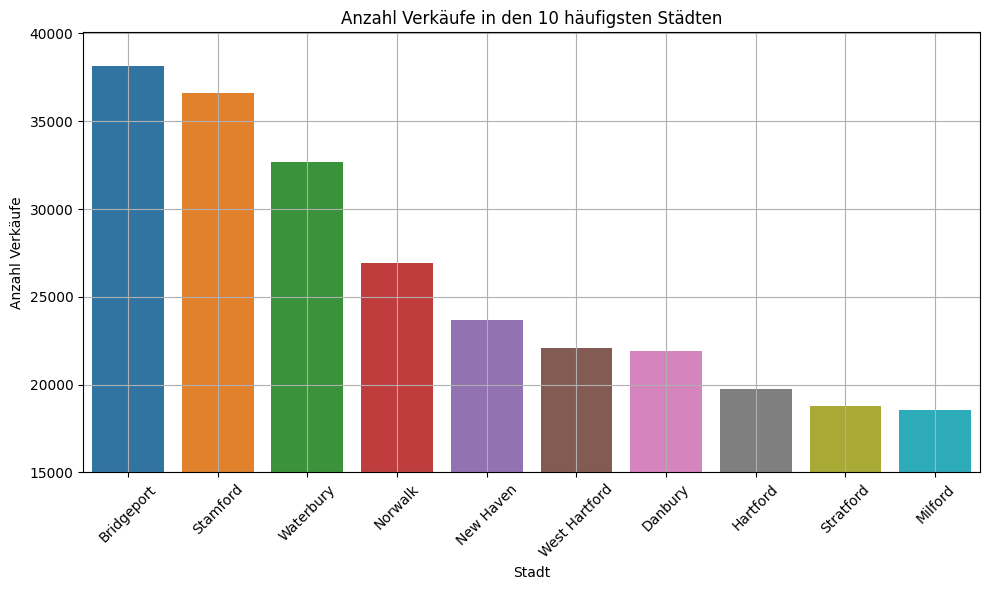

In [7]:

sale_counts = data['Town'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
# Jede Stadt erhält eine eigene Farbe
colors = sns.color_palette("tab10", n_colors=len(sale_counts))
sns.barplot(x=sale_counts.index, y=sale_counts.values, palette=colors)
plt.title('Anzahl Verkäufe in den 10 häufigsten Städten')
plt.xlabel('Stadt')
plt.ylabel('Anzahl Verkäufe')
plt.xticks(rotation=45)
plt.ylim(15000, sale_counts.values.max() * 1.05)  # y-Achse beginnt bei 20000
plt.grid(True)
plt.tight_layout()
plt.show()


Hier werden die aktivsten Städte im Immobilienmarkt sichtbar.



### Heatmap

Eine Heatmap kann verwendet werden, um die durchschnittlichen Preise pro Stadl und Jahr zu visualisieren.

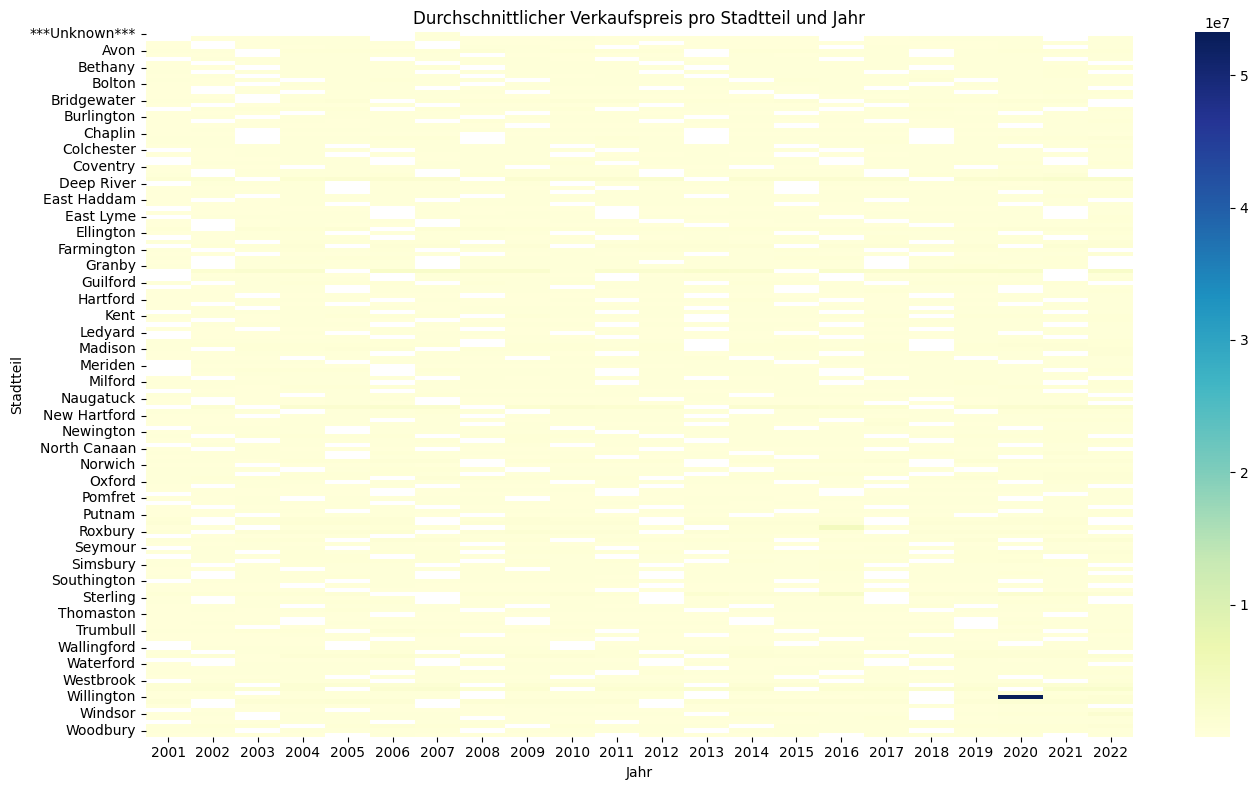

In [8]:
pivot = data.pivot_table(values='Sale Amount', index='Town', columns='List Year', aggfunc='mean')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Durchschnittlicher Verkaufspreis pro Stadtteil und Jahr')
plt.xlabel('Jahr')
plt.ylabel('Stadtteil')
plt.tight_layout()
plt.show()


Farbunterschiede zeigen, wo und wann die Preise besonders hoch oder niedrig waren.


Anbei weitere Visualisierungen:

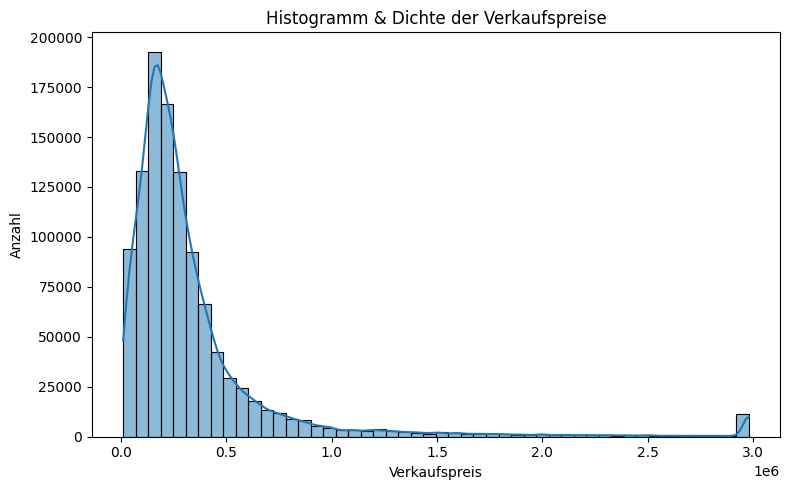

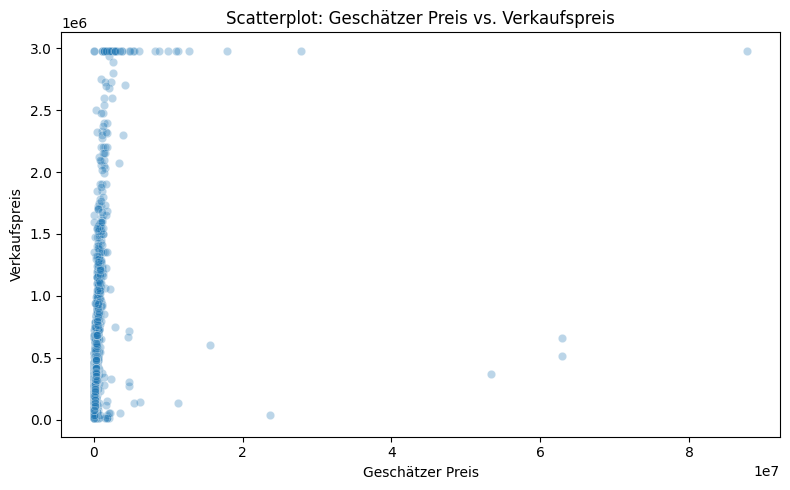

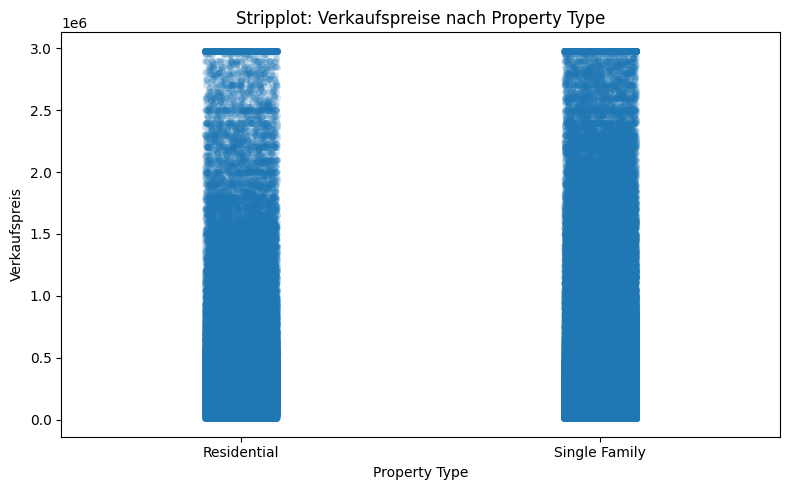

In [9]:

# Histogramm: Verteilung der Verkaufspreise (geclipped)
plt.figure(figsize=(8, 5))
sns.histplot(data_clipped['Sale Amount'], bins=50, kde=True)
plt.title('Histogramm & Dichte der Verkaufspreise')
plt.xlabel('Verkaufspreis')
plt.ylabel('Anzahl')
plt.tight_layout()
plt.show()

# Scatter Plot: Verkaufspreis vs. Bewertungswert
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Assessed Value', y='Sale Amount', data=data_clipped.sample(5000, random_state=1), alpha=0.3)
plt.title('Scatterplot: Geschätzer Preis vs. Verkaufspreis')
plt.xlabel('Geschätzer Preis')
plt.ylabel('Verkaufspreis')
plt.tight_layout()
plt.show()

# Strip Plot: Verkaufspreise nach Property Type (nur Top 2 Typen)
top_types = data_clipped['Property Type'].value_counts().nlargest(2).index
plt.figure(figsize=(8, 5))
sns.stripplot(x='Property Type', y='Sale Amount', data=data_clipped[data_clipped['Property Type'].isin(top_types)], alpha=0.2, jitter=True)
plt.title('Stripplot: Verkaufspreise nach Property Type')
plt.xlabel('Property Type')
plt.ylabel('Verkaufspreis')
plt.tight_layout()
plt.show()

In [10]:
data

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,2200073,2022,10/11/2022,Stamford,193 SADDLE HILL ROAD,483380.0,865000.0,0.5588,Residential,Single Family,NaN,NaN,NaN,POINT (-73.577612999 41.148977983)
1097625,220369,2022,09/29/2023,Wethersfield,37 LUCA LN,20650.0,760857.0,0.0271,Residential,Single Family,07 - Change in Property,NEW CONSTRUCTION - NOT COMPLETE FOR 10/1/2022,NaN,POINT (-72.663607 41.712487)
1097626,2200470,2022,01/09/2023,Stamford,1096 EAST MAIN STREET #16-D-1,132900.0,220000.0,0.6040,Residential,Condo,NaN,NaN,NaN,POINT (-73.515726977 41.057837988)
1097627,22396,2022,09/26/2023,Old Saybrook,115 SHEFFIELD ST,1099400.0,1575000.0,0.6980,Residential,Single Family,NaN,NaN,NaN,POINT (-72.368005967 41.289124997)


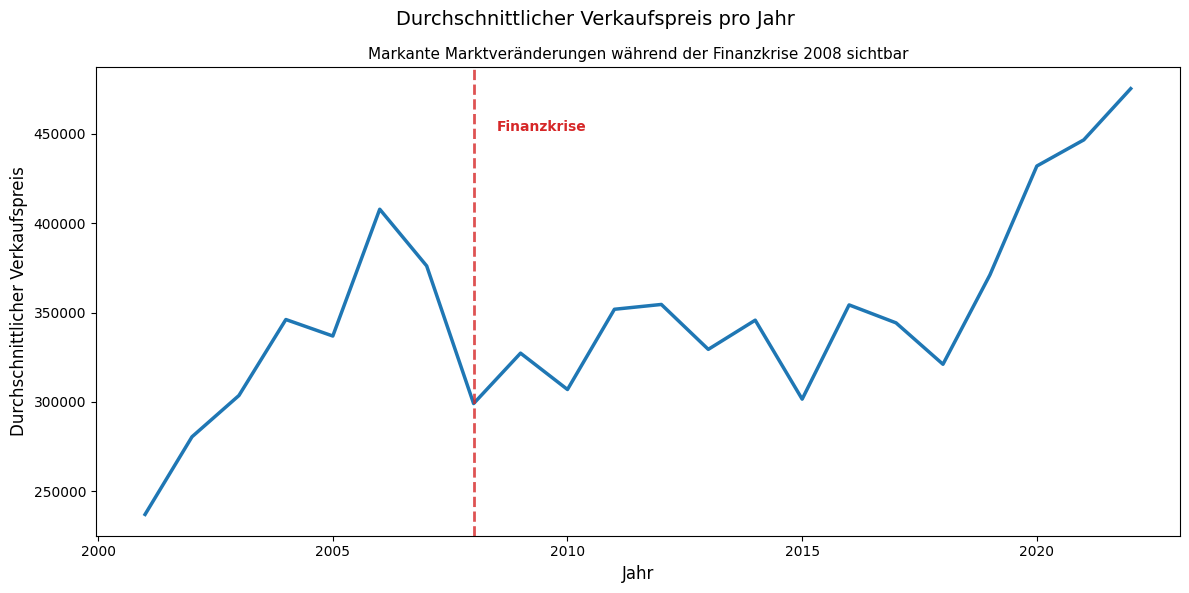

In [11]:
plt.figure(figsize=(12, 6))
# Hauptlinie ohne Marker für sauberen Look
plt.plot(avg_price_per_year.index, avg_price_per_year.values, 
         linewidth=2.5, color='#1f77b4', label='Durchschnittspreis')

# Krisenlinien hervorheben
plt.axvline(x=2008, color='#d62728', linestyle='--', linewidth=2, alpha=0.8)

# Beschriftungen für Krisen
plt.text(2008.5, max(avg_price_per_year.values)*0.95, 'Finanzkrise', 
         color='#d62728', fontweight='bold', fontsize=10)

plt.suptitle('Durchschnittlicher Verkaufspreis pro Jahr', fontsize=14)
plt.title('Markante Marktveränderungen während der Finanzkrise 2008 sichtbar', fontsize=11)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Durchschnittlicher Verkaufspreis', fontsize=12)
plt.tight_layout()
plt.show()


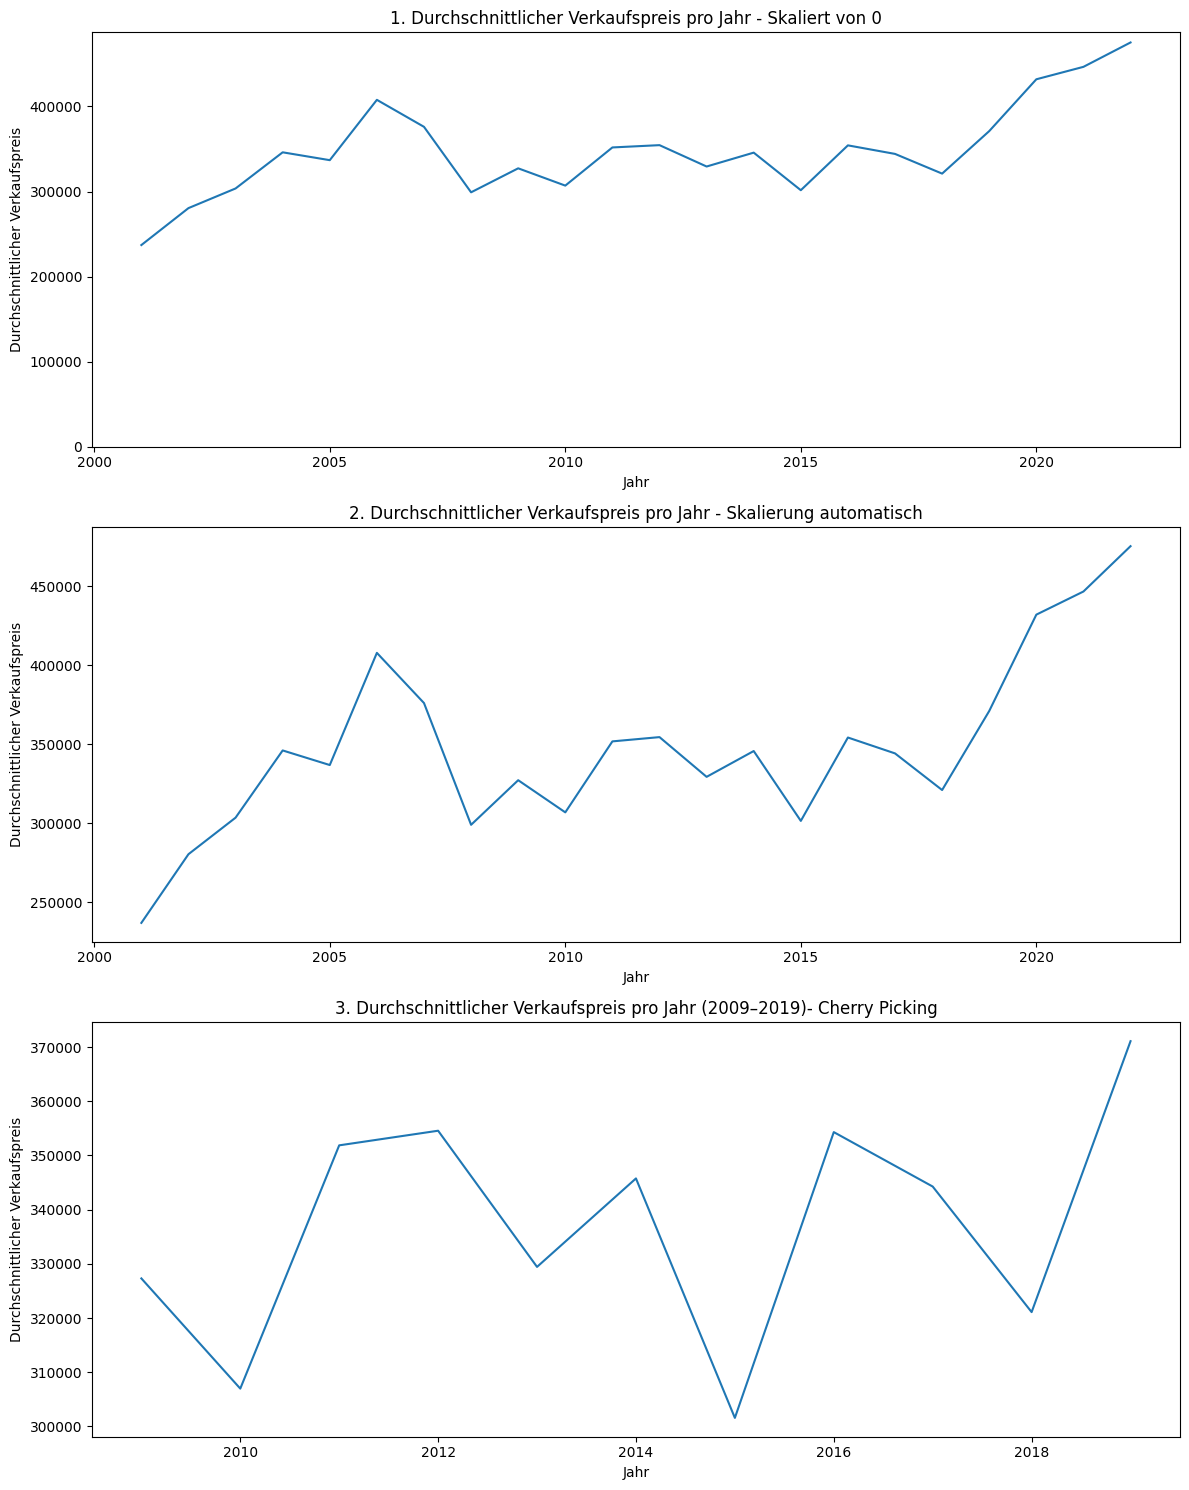

In [12]:
filtered_avg_price = avg_price_per_year.loc[(avg_price_per_year.index >= 2009) & (avg_price_per_year.index <= 2019)]

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Plot 1: Gesamte Zeitreihe mit y-Achse ab 0
sns.lineplot(ax=axes[0], x=avg_price_per_year.index, y=avg_price_per_year.values)
axes[0].set_title('1. Durchschnittlicher Verkaufspreis pro Jahr - Skaliert von 0')
axes[0].set_xlabel('Jahr')
axes[0].set_ylabel('Durchschnittlicher Verkaufspreis')
axes[0].set_ylim(0)

# Plot 2: Gesamte Zeitreihe (ohne y-Achse ab 0, falls gewünscht)
sns.lineplot(ax=axes[1], x=avg_price_per_year.index, y=avg_price_per_year.values)
axes[1].set_title('2. Durchschnittlicher Verkaufspreis pro Jahr - Skalierung automatisch')
axes[1].set_xlabel('Jahr')
axes[1].set_ylabel('Durchschnittlicher Verkaufspreis')

# Plot 3: Zeitraum 2009–2019
sns.lineplot(ax=axes[2], x=filtered_avg_price.index, y=filtered_avg_price.values)
axes[2].set_title('3. Durchschnittlicher Verkaufspreis pro Jahr (2009–2019)- Cherry Picking')
axes[2].set_xlabel('Jahr')
axes[2].set_ylabel('Durchschnittlicher Verkaufspreis')

plt.tight_layout()
plt.show()


C:\Users\Sandra\AppData\Local\Temp\ipykernel_21144\1994980943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


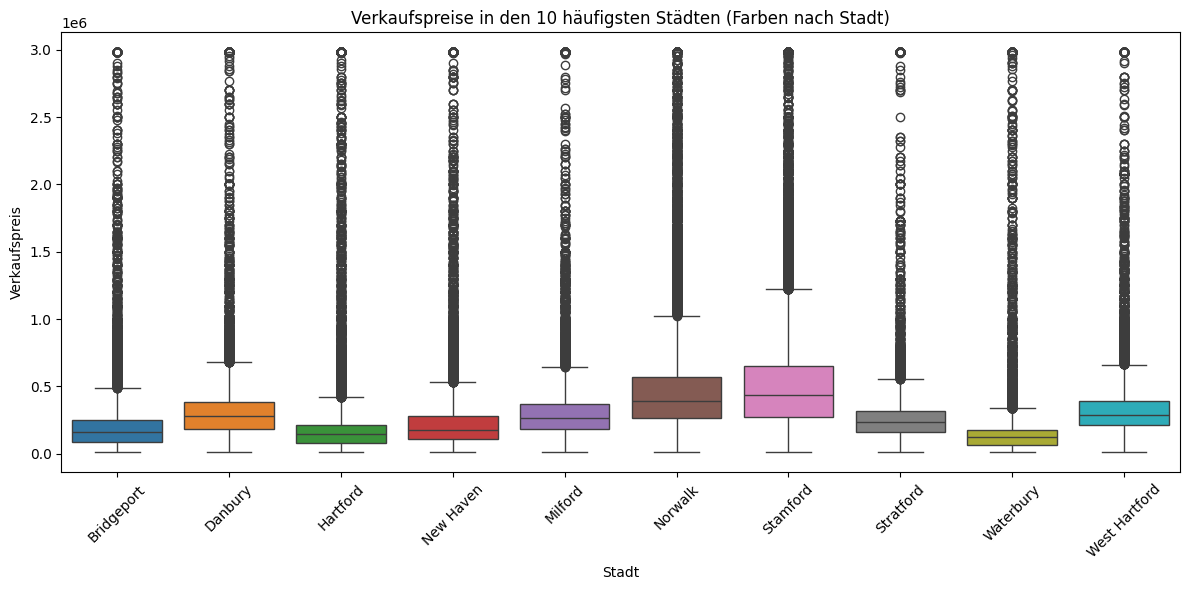

In [13]:
# Beispiel: Boxplot mit unterschiedlichen Farben für jede Stadt
plt.figure(figsize=(12, 6))
palette = sns.color_palette("tab10", n_colors=len(top_towns))
sns.boxplot(
    x='Town',
    y='Sale Amount',
    data=data_clipped[data_clipped['Town'].isin(top_towns)],
    palette=palette
)
plt.title('Verkaufspreise in den 10 häufigsten Städten (Farben nach Stadt)')
plt.xlabel('Stadt')
plt.ylabel('Verkaufspreis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

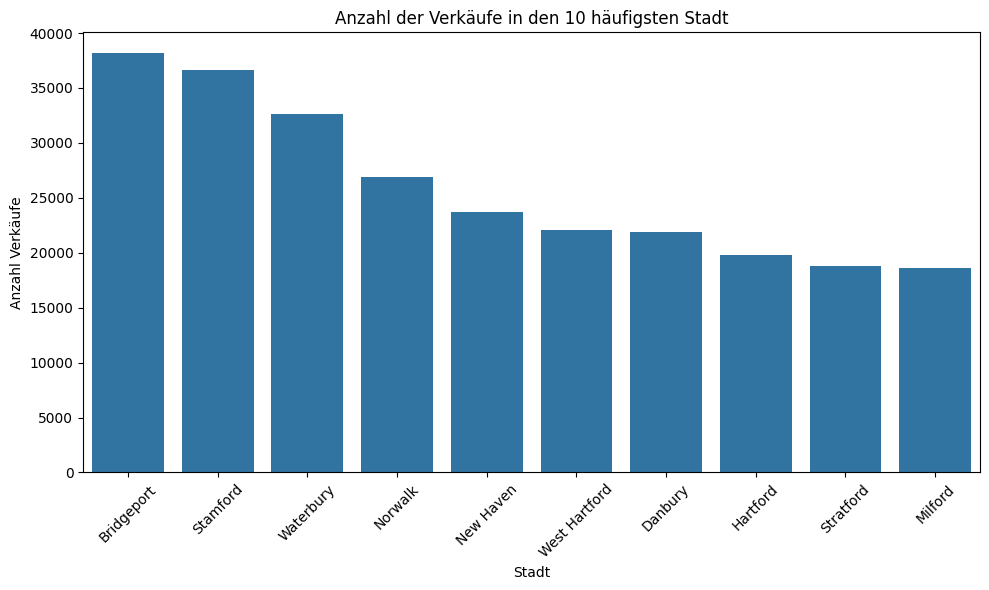

In [14]:
sale_counts = data['Town'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=sale_counts.index, y=sale_counts.values)
plt.title('Anzahl der Verkäufe in den 10 häufigsten Stadt')
plt.xlabel('Stadt')
plt.ylabel('Anzahl Verkäufe')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Sandra\AppData\Local\Temp\ipykernel_21144\2329940129.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], x=sale_counts_all.index, y=sale_counts_all.values, palette=colors_all)
C:\Users\Sandra\AppData\Local\Temp\ipykernel_21144\2329940129.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(sale_counts_all.index, rotation=90)
C:\Users\Sandra\AppData\Local\Temp\ipykernel_21144\2329940129.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(sale_counts_top10.index, rotation=45)


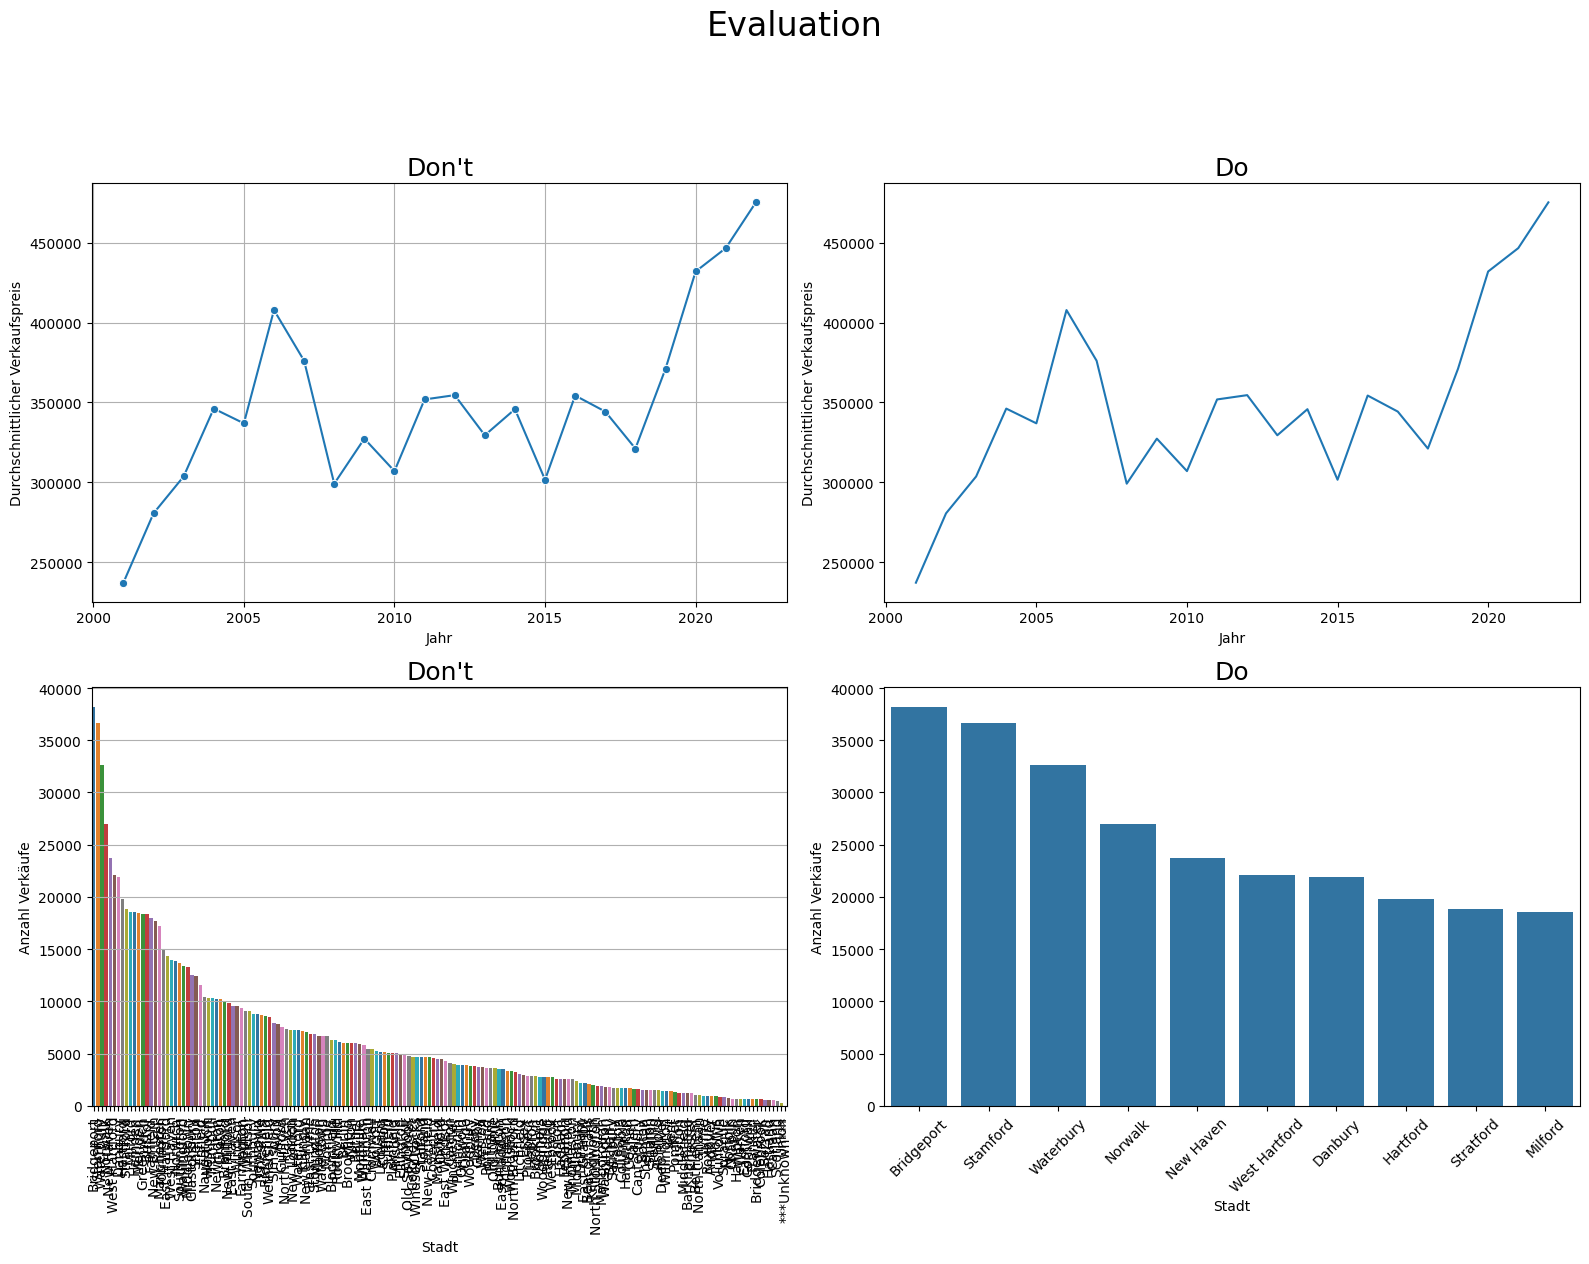

In [15]:
# Daten für die Balkendiagramme
sale_counts_all = data['Town'].value_counts()
sale_counts_top10 = sale_counts_all.nlargest(10)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Evaluation', fontsize=24, y=1.05)

# Spaltentitel
axes[0, 0].set_title("Don't", fontsize=18, pad=20)
axes[0, 1].set_title('Do', fontsize=18, pad=20)

# 1. Zeile: Liniendiagramme
sns.lineplot(ax=axes[0, 0], x=avg_price_per_year.index, y=avg_price_per_year.values, marker='o')
axes[0, 0].set_xlabel('Jahr')
axes[0, 0].set_ylabel('Durchschnittlicher Verkaufspreis')
axes[0, 0].set_title("Don't", fontsize=18)
axes[0, 0].grid(True)

sns.lineplot(ax=axes[0, 1], x=avg_price_per_year.index, y=avg_price_per_year.values)
axes[0, 1].set_xlabel('Jahr')
axes[0, 1].set_ylabel('Durchschnittlicher Verkaufspreis')
axes[0, 1].set_title('Do', fontsize=18)


# 2. Zeile: Balkendiagramme
# Don't: Alle Städte (zu viele Balken, unübersichtlich)
colors_all = sns.color_palette("tab10", n_colors=len(sale_counts_all))
sns.barplot(ax=axes[1, 0], x=sale_counts_all.index, y=sale_counts_all.values, palette=colors_all)
axes[1, 0].set_xlabel('Stadt')
axes[1, 0].set_ylabel('Anzahl Verkäufe')
axes[1, 0].set_title("Don't", fontsize=18)
axes[1, 0].set_xticklabels(sale_counts_all.index, rotation=90)
axes[1, 0].set_ylim(0, sale_counts_all.values.max() * 1.05)
axes[1, 0].grid(True, axis='y')

# Do: Nur Top 10 Städte, übersichtlich
sns.barplot(ax=axes[1, 1], x=sale_counts_top10.index, y=sale_counts_top10.values)
axes[1, 1].set_xlabel('Stadt')
axes[1, 1].set_ylabel('Anzahl Verkäufe')
axes[1, 1].set_title('Do', fontsize=18)
axes[1, 1].set_xticklabels(sale_counts_top10.index, rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show();

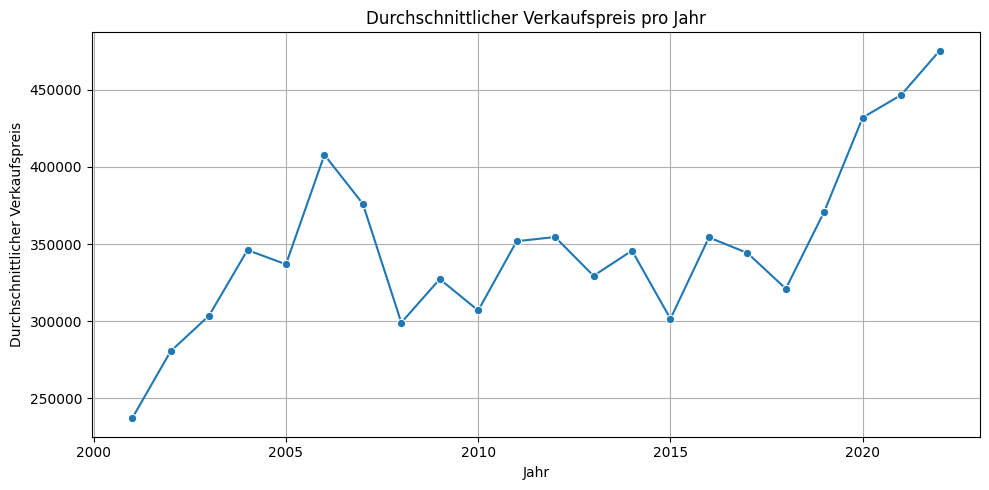

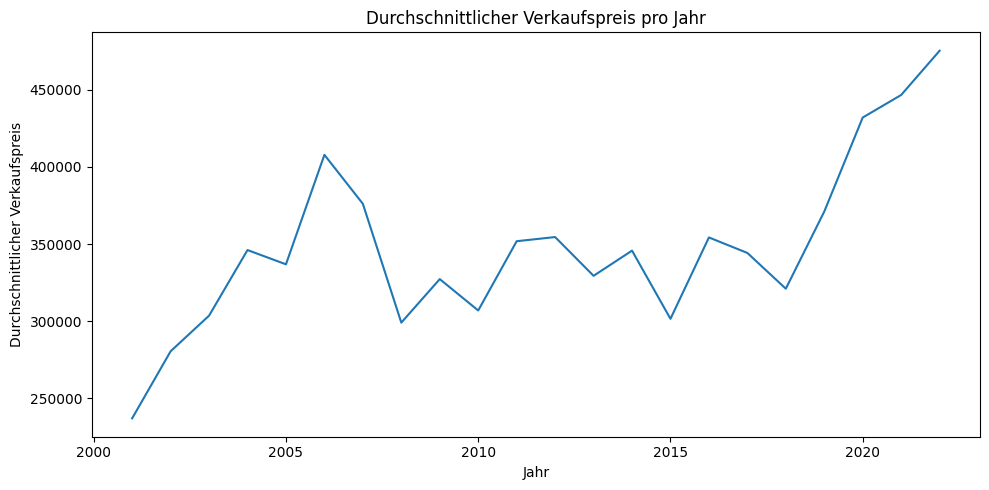

C:\Users\Sandra\AppData\Local\Temp\ipykernel_21144\1221591550.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sale_counts.index, y=sale_counts.values, palette=colors)


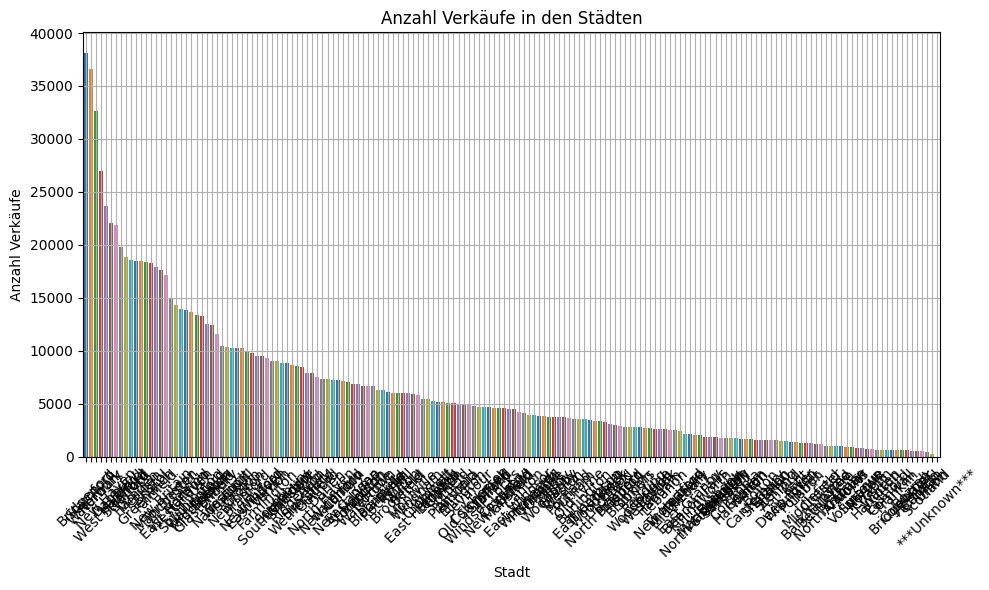

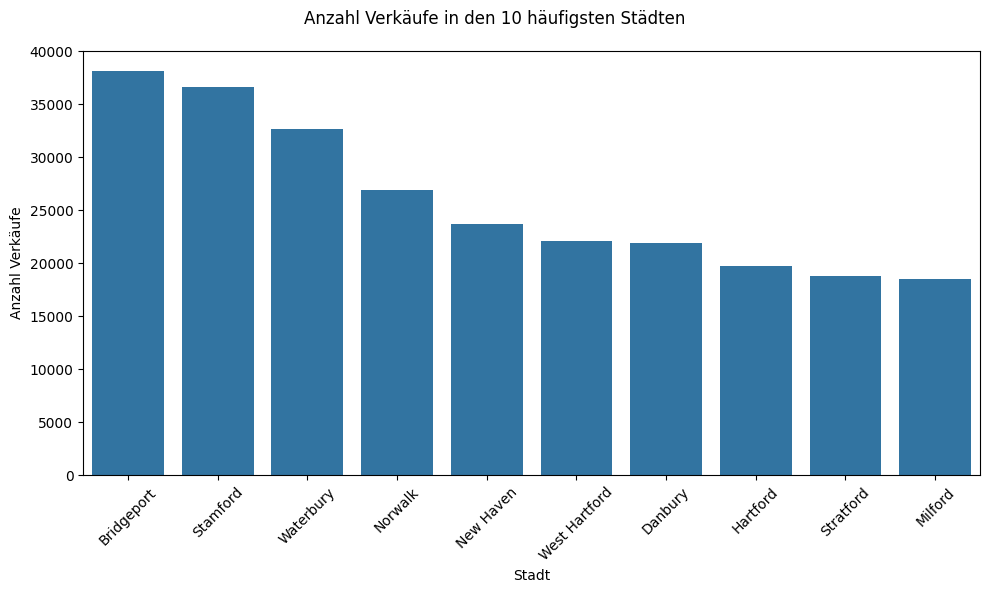

In [16]:
#  1. linechart
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_price_per_year.index, y=avg_price_per_year.values, marker="o")
plt.title('Durchschnittlicher Verkaufspreis pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittlicher Verkaufspreis')
plt.grid(True)
plt.tight_layout()
plt.show()

#  2. linechart

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_price_per_year.index, y=avg_price_per_year.values)
plt.title('Durchschnittlicher Verkaufspreis pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittlicher Verkaufspreis')
plt.tight_layout()
plt.show()


# 1. bar chart

sale_counts = data['Town'].value_counts()
plt.figure(figsize=(10, 6))
# Jede Stadt erhält eine eigene Farbe
colors = sns.color_palette("tab10", n_colors=len(sale_counts))
sns.barplot(x=sale_counts.index, y=sale_counts.values, palette=colors)
plt.title('Anzahl Verkäufe in den Städten')
plt.xlabel('Stadt')
plt.ylabel('Anzahl Verkäufe')
plt.xticks(rotation=45)
plt.ylim(0, sale_counts.values.max() * 1.05)  # y-Achse beginnt bei 20000
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. bar chart

sale_counts = data['Town'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))

sns.barplot(x=sale_counts.index, y=sale_counts.values)
plt.suptitle('Anzahl Verkäufe in den 10 häufigsten Städten')
plt.xlabel('Stadt')
plt.ylabel('Anzahl Verkäufe')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [17]:
from plotnine import *


In [18]:
plt.rcParams["figure.dpi"] = 110          # knackige Auflösung
df = (pd.read_csv("data/Real_Estate_Sales_2001-2022_GL.csv", low_memory=False)
        .assign(year=lambda d: pd.to_datetime(d["Date Recorded"]).dt.year))


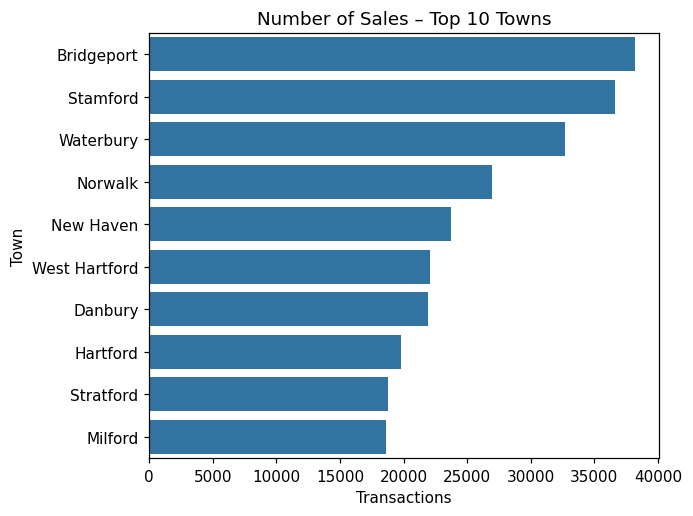

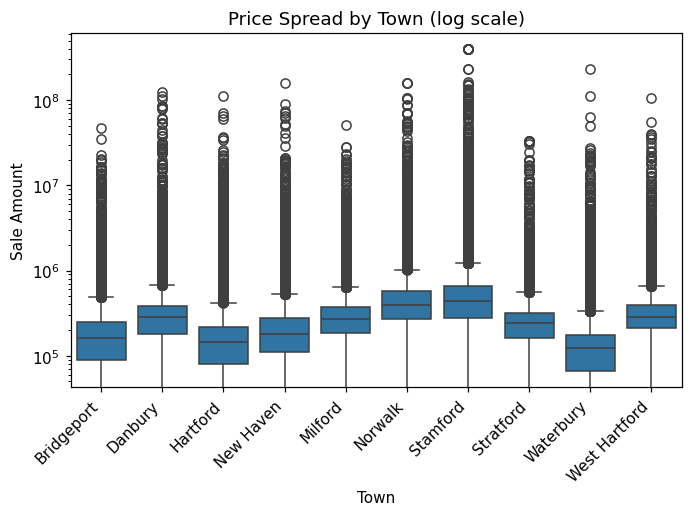

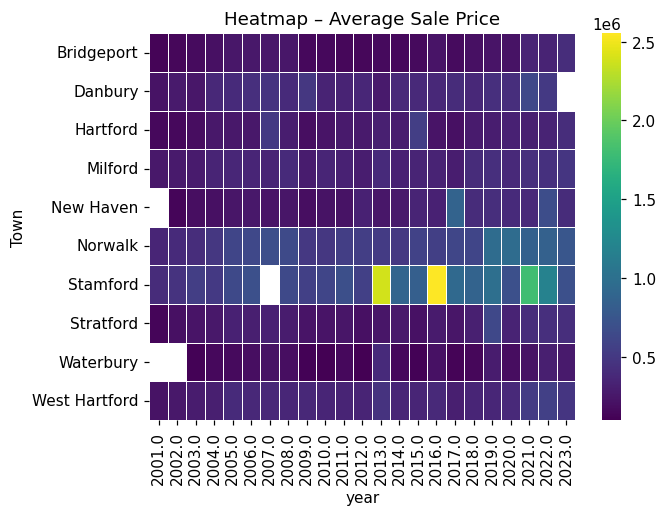

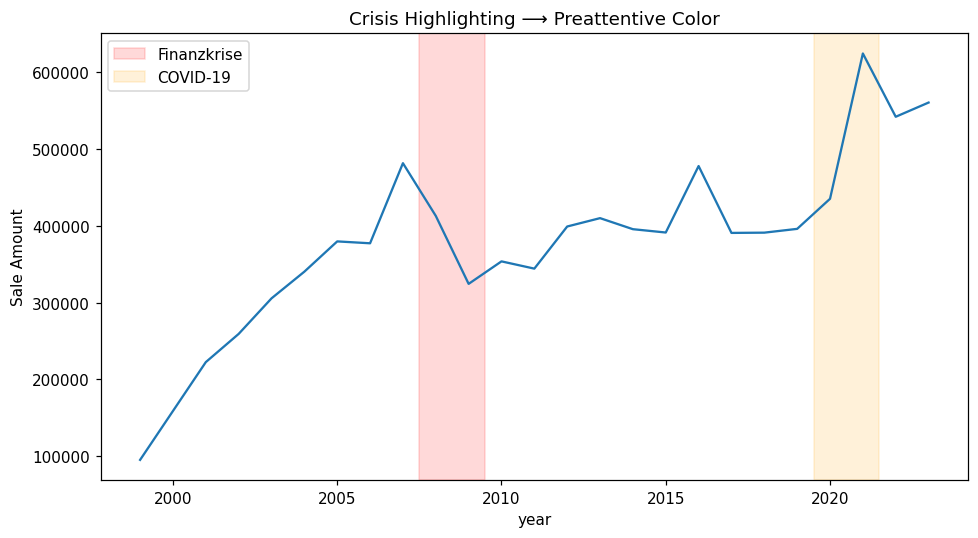

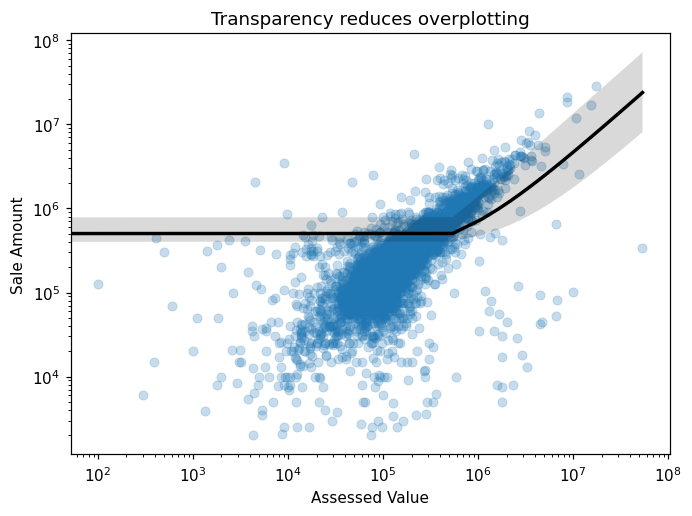

C:\Users\Sandra\AppData\Local\Temp\ipykernel_21144\4260954803.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



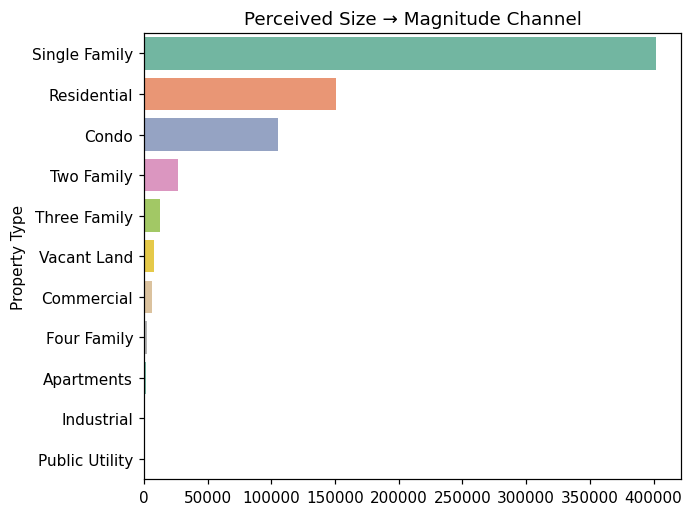

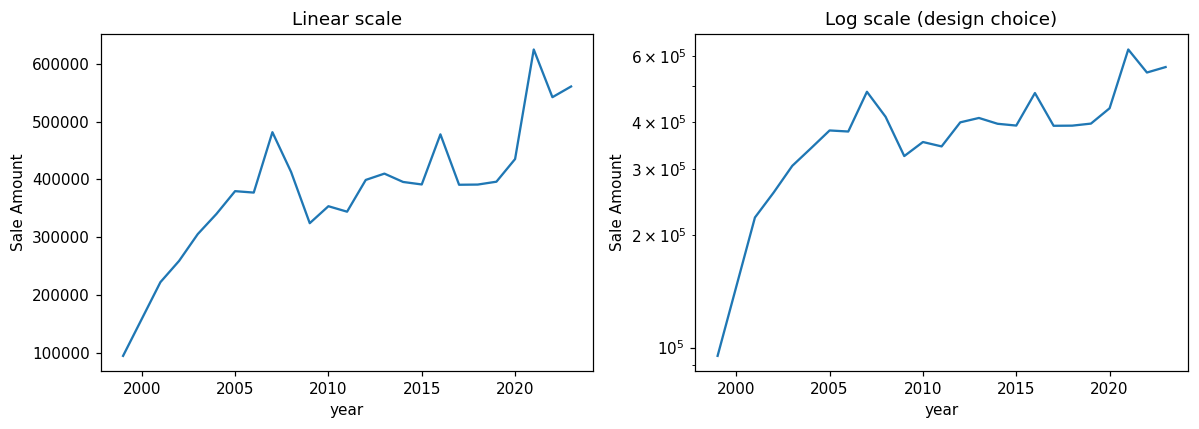

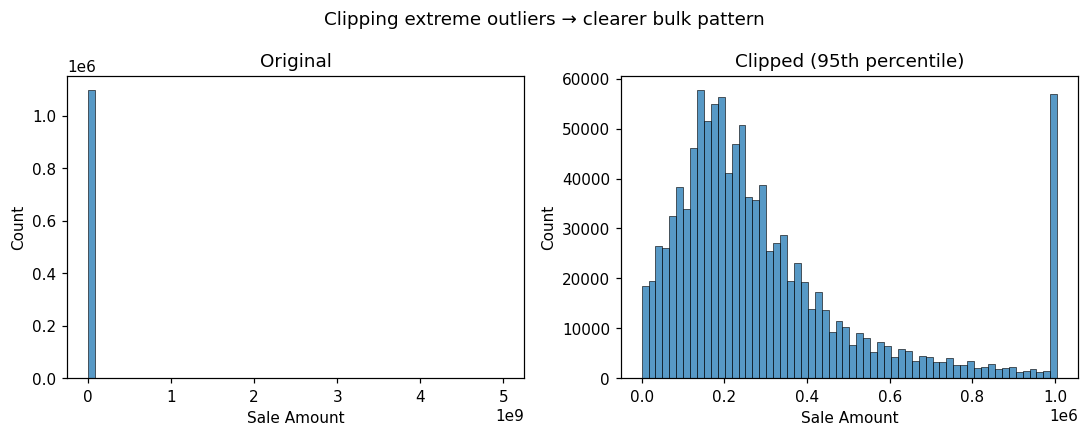

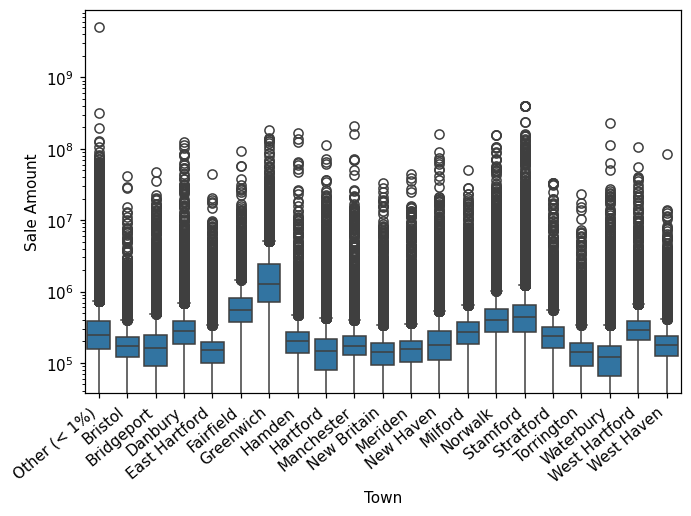

c:\Users\Sandra\Documents\GitHub\gdv\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


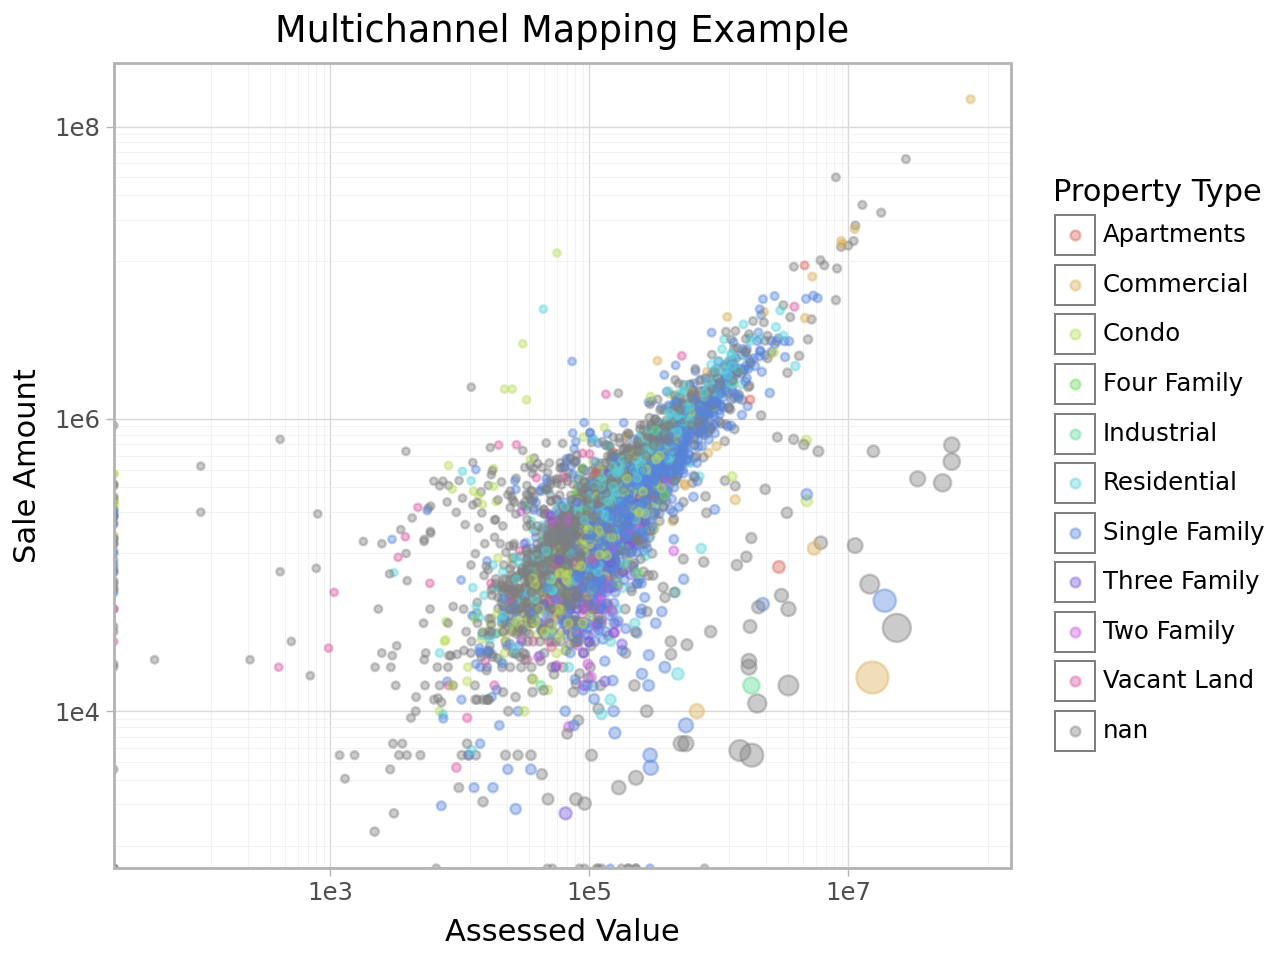

In [19]:
annual = df.groupby('year')['Sale Amount'].mean().reset_index()


top10 = df["Town"].value_counts().nlargest(10)
sns.barplot(y=top10.index, x=top10.values, orient="h")
plt.title("Number of Sales – Top 10 Towns")
plt.xlabel("Transactions")
plt.tight_layout()
plt.show()


df_top = df[df["Town"].isin(top10.index)]
sns.boxplot(data=df_top, x="Town", y="Sale Amount")
plt.yscale("log")
plt.xticks(rotation=45, ha="right")
plt.title("Price Spread by Town (log scale)")
plt.tight_layout()
plt.show()

pivot = df_top.pivot_table(index="Town", columns="year", values="Sale Amount", aggfunc="mean")
sns.heatmap(pivot, cmap="viridis", linewidth=.5)
plt.title("Heatmap – Average Sale Price")
plt.tight_layout()
plt.show()


# LE2
fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(data=annual, x="year", y="Sale Amount", ax=ax)
ax.axvspan(2007.5, 2009.5, color="red", alpha=.15, label="Finanzkrise")
ax.axvspan(2019.5, 2021.5, color="orange", alpha=.15, label="COVID-19")
ax.legend()
ax.set_title("Crisis Highlighting ⟶ Preattentive Color")
plt.tight_layout()
plt.show()


sample = df.sample(6000, random_state=0)
sns.scatterplot(data=sample, x="Assessed Value", y="Sale Amount", alpha=.25, edgecolor=None)
sns.regplot(data=sample, x="Assessed Value", y="Sale Amount", scatter=False, color="k")
plt.xscale("log")
plt.yscale("log")
plt.title("Transparency reduces overplotting")
plt.tight_layout()
plt.show()


cnt = df["Property Type"].value_counts()
sns.barplot(x=cnt.values, y=cnt.index, palette="Set2")
plt.title("Perceived Size → Magnitude Channel")
plt.tight_layout()
plt.show()


# LE3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4), sharex=True)
sns.lineplot(data=annual, x="year", y="Sale Amount", ax=ax1)
ax1.set_title("Linear scale")
sns.lineplot(data=annual, x="year", y="Sale Amount", ax=ax2)
ax2.set_yscale("log")
ax2.set_title("Log scale (design choice)")
plt.tight_layout()
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df["Sale Amount"], bins=60, ax=ax1)
ax1.set_title("Original")
sns.histplot(df["Sale Amount"].clip(upper=df["Sale Amount"].quantile(.95)), bins=60, ax=ax2)
ax2.set_title("Clipped (95th percentile)")
plt.suptitle("Clipping extreme outliers → clearer bulk pattern")
plt.tight_layout()
plt.show()

df_mod = df.copy()
rare = df_mod["Town"].value_counts()[20:].index
df_mod.loc[df_mod["Town"].isin(rare), "Town"] = "Other (< 1%)"
sns.boxplot(data=df_mod, x="Town", y="Sale Amount")
plt.yscale("log")
plt.xticks(rotation=40, ha="right")
plt.tight_layout()
plt.show()


# LE4


(
    ggplot(annual, aes("year", "Sale Amount"))
    + geom_line()
    + labs(title="ggplot-style Time Series", y="Average Price ($)", x="")
    + theme_minimal()
)

top6 = df["Town"].value_counts().head(6).index
df6 = df[df["Town"].isin(top6)]
(
    ggplot(df6, aes("year", "Sale Amount"))
    + geom_line()
    + facet_wrap("~Town", ncol=3)
    + scale_y_log10()
    + theme_bw()
    + labs(title="Price Trajectories per Town (log-scale)")
)


sample = df.sample(8000, random_state=1)
(
    ggplot(sample, aes("Assessed Value", "Sale Amount", color="Property Type", size="Sales Ratio"))
    + geom_point(alpha=.4)
    + scale_x_log10()
    + scale_y_log10()
    + theme_light()
    + guides(size=False)
    + labs(title="Multichannel Mapping Example")
)


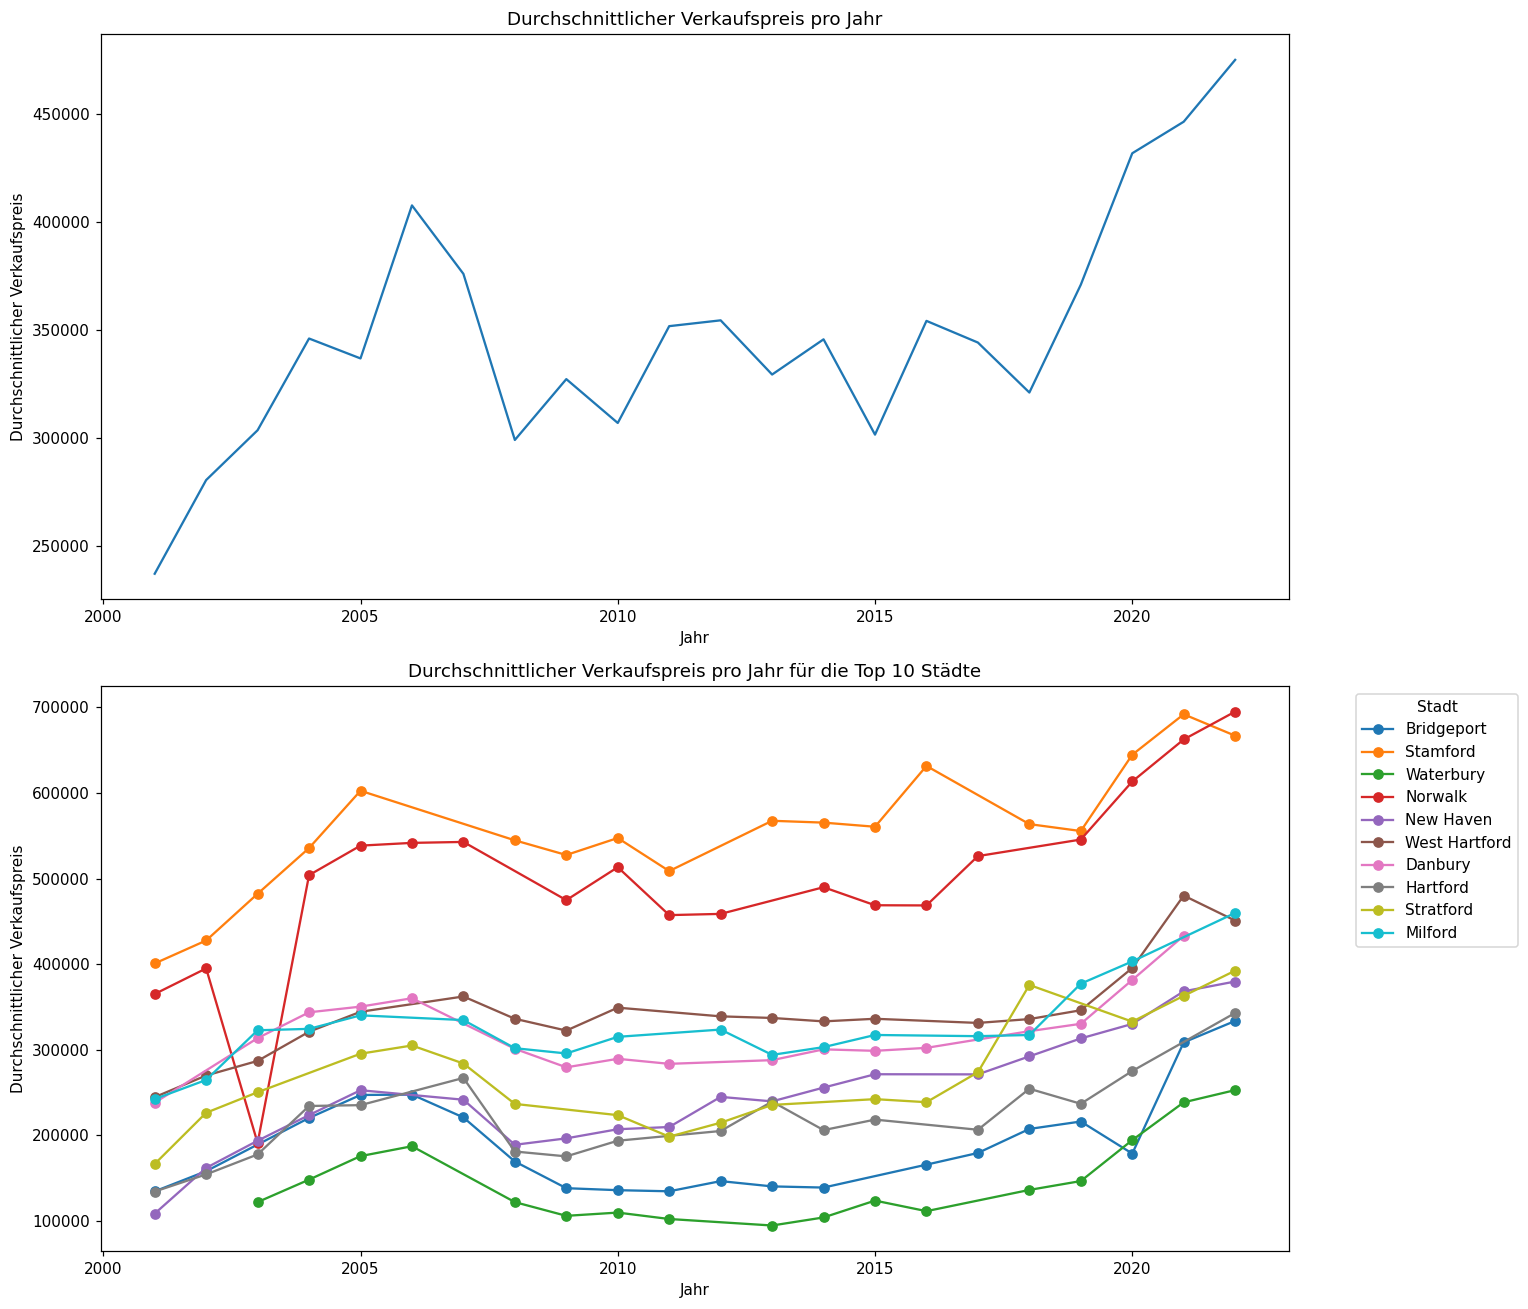

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot 1: Gesamtdurchschnitt pro Jahr
sns.lineplot(x=avg_price_per_year.index, y=avg_price_per_year.values, ax=axes[0])
axes[0].set_title('Durchschnittlicher Verkaufspreis pro Jahr')
axes[0].set_xlabel('Jahr')
axes[0].set_ylabel('Durchschnittlicher Verkaufspreis')

# Plot 2: Durchschnitt pro Jahr für Top 10 Städte
for town in top_towns:
    subset = avg_price_town_year[avg_price_town_year['Town'] == town]
    axes[1].plot(subset['List Year'], subset['Sale Amount'], label=town, marker='o')
axes[1].set_title('Durchschnittlicher Verkaufspreis pro Jahr für die Top 10 Städte')
axes[1].set_xlabel('Jahr')
axes[1].set_ylabel('Durchschnittlicher Verkaufspreis')
axes[1].legend(title='Stadt', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
